**4.(a) Visualization of the data**

In [33]:
#importing required libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
#reading KPCA data from given link
kp_data= pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv')
kp_data.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


In [35]:
#checking data types
print(kp_data.dtypes)


x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
dtype: object


**Observation:**
All data are float type.

In [36]:
#checking whether there are null entries or not
for col in kp_data.columns.values:
   vals = pd.unique(kp_data[col])
   print(col + ' has ' + str(len(vals)) + ' unique values and '+ str(kp_data[col].isnull().sum()) + ' null entries')
   if len(vals) < 20:
     lst_str=''
     for n in range(0, len(vals)):
       lst_str= lst_str + str(vals[n]) + ','

x1 has 190 unique values and 0 null entries
x2 has 190 unique values and 0 null entries
x3 has 190 unique values and 0 null entries
x4 has 190 unique values and 0 null entries
x5 has 190 unique values and 0 null entries
x6 has 190 unique values and 0 null entries
x7 has 190 unique values and 0 null entries


**Observation:** There are no null entries.

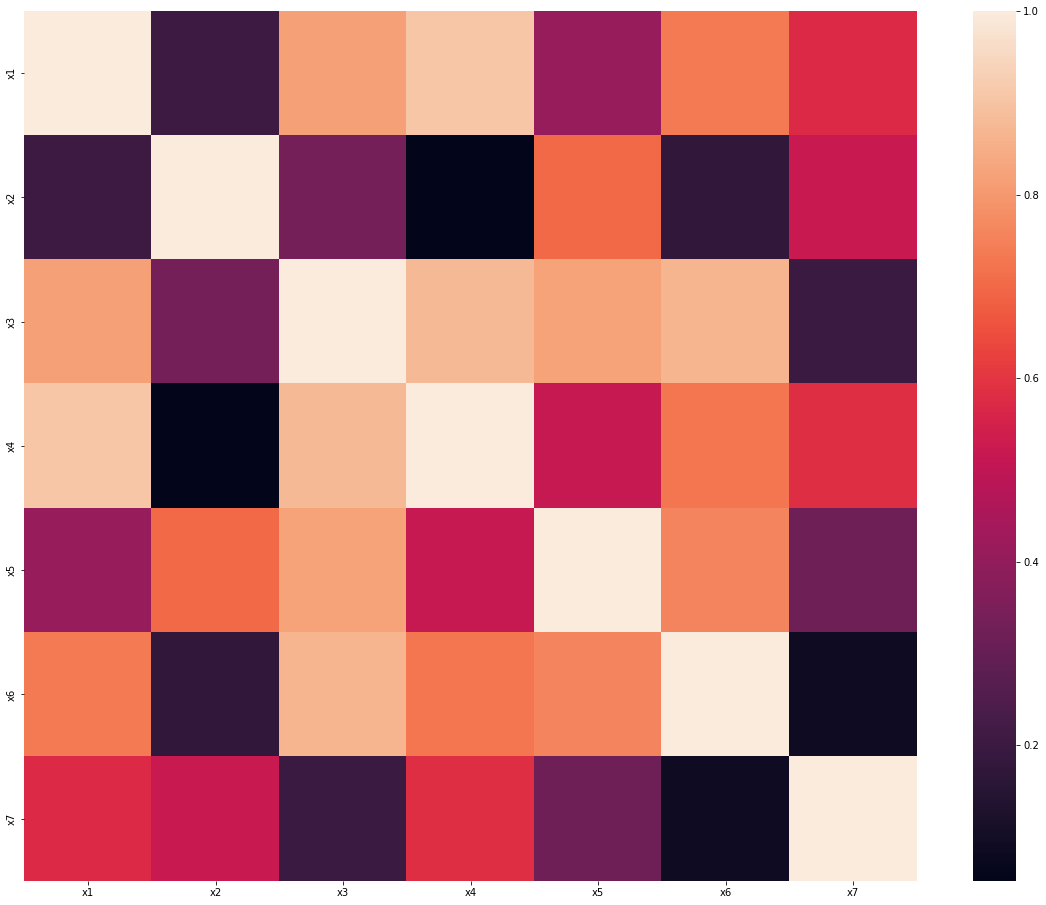

In [37]:
#plotting heatmap for correlation matrix
corrMatrix = kp_data.corr(method='spearman')
fig, ax= plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

**Observation:**
No co-relations between features.

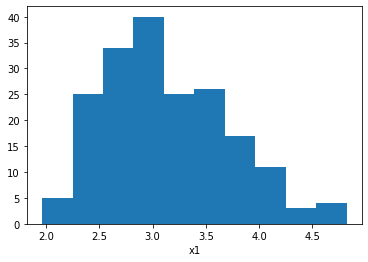

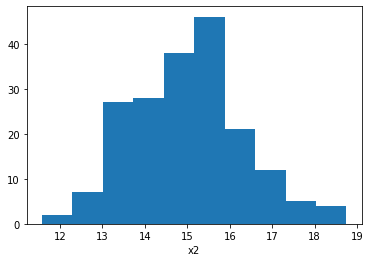

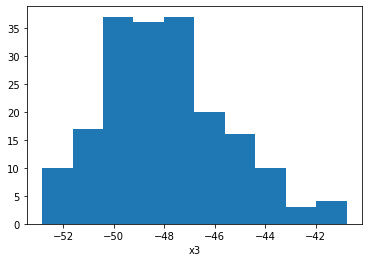

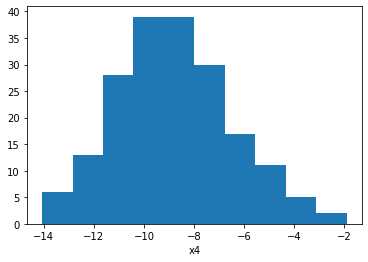

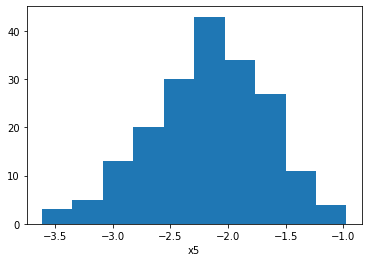

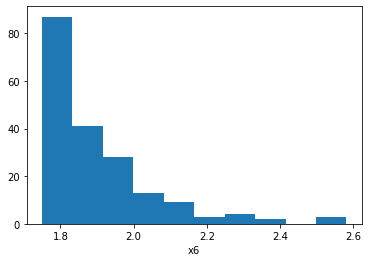

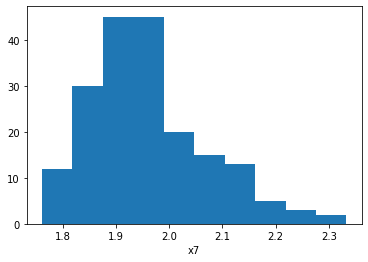

In [38]:
#plotting histogram to check distribution of data
for col in kp_data.columns.values:
  if (kp_data[col].dtypes == 'float64')| (kp_data[col].dtypes == 'object'):
    plt.hist(kp_data[col])
    plt.xlabel(col)
    plt.show()

**Observation:**
All features are nearly following normal distribution except X6 which is rightly skewed. 

In [39]:
#data is scaled by using standard scalar
scaling = StandardScaler()
coln_names = ['x1','x2','x3','x4','x5','x6','x7']
kp_data_scaled = kp_data.copy()
variables= kp_data_scaled[coln_names]
kp_data_scaled[coln_names] = scaling.fit_transform(variables.values)
kp_data_scaled

,x1,x2,x3,x4,x5,x6,x7
0,-0.893531,0.214228,0.660423,-0.935894,-0.180173,0.263020,0.750311
1,-0.043014,-0.155081,-0.108467,0.005283,-0.089272,-0.268499,-0.334918
2,0.406310,-0.162711,-0.636915,-0.093875,0.823388,-0.884520,0.771011
3,-1.543484,0.032201,1.919837,-2.039160,-0.926059,1.924996,1.692138
4,0.471557,0.100418,-0.614413,0.838262,0.297131,-0.664890,-0.762999
...,...,...,...,...,...,...,...
185,-0.807654,-0.570860,1.207451,-0.686765,-1.256448,1.194522,-0.500716
186,-0.755195,-0.282037,0.869675,-0.593882,-0.920429,0.904699,-0.437642
187,0.718876,-0.384799,-0.726786,0.445573,0.615125,-0.890292,-0.049603
188,0.752135,-0.803030,-0.498140,0.281049,0.141035,-0.756958,-0.404772


**4.(b) Training of KPCA**

In [40]:
#training KPCA algorithm
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kp_data_trained= kernel_pca.fit(kp_data_scaled).transform(kp_data_scaled)
kp_data_trained

array([[-1.05428335e-02, -1.88729041e-02, -8.19736227e-03, ...,
        -2.15669929e-04,  4.99529521e-06,  1.17322679e-04],
       [ 2.24116408e-01,  9.64632223e-02,  9.74867879e-03, ...,
        -2.02441493e-04,  3.50791671e-06,  8.90919411e-05],
       [-1.08790577e-02, -1.95115670e-02, -8.53428485e-03, ...,
        -2.06300456e-04,  4.79230360e-06,  1.12789189e-04],
       ...,
       [-1.92800448e-02, -3.40624534e-02, -1.90379680e-02, ...,
        -8.13802616e-04,  3.49997252e-06,  3.79791705e-05],
       [-1.45898559e-02, -2.70222513e-02, -1.10701131e-02, ...,
        -1.79243263e-04,  3.93521472e-05,  9.18984260e-05],
       [-1.61156569e-02, -3.04026020e-02, -8.09462706e-03, ...,
        -1.54205862e-04, -1.14737745e-04,  8.80100532e-05]])

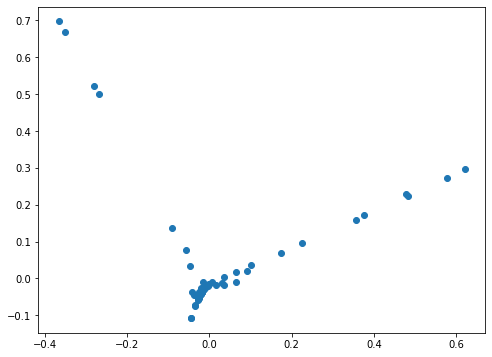

In [41]:
#plotting pair-wise scatter plot
plt.figure(figsize=(8,6))
plt.scatter(kp_data_trained[:,0],kp_data_trained[:,1])

**4.(c) Plotting the variance explained versus KPCA dimensions for up to 10 dimensions**

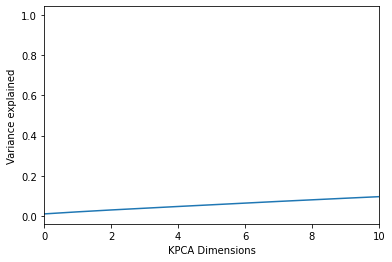

In [42]:
import numpy as np
explained_variance = np.var(kp_data_trained, axis=0)  #calculation of explained variance
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance))
plt.xlim(0,10)                                        #plotting upto KPCA dimensions 10
plt.xlabel('KPCA Dimensions')
plt.ylabel('Variance explained');

**References:**

1.https://www.youtube.com/watch?v=Ato-hcv0NK0&list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6&index=3

2.https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

3.https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html